In [14]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [18]:
# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
img = cv2.imread('SGV_12N_00059.jpg')
  
# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
  
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

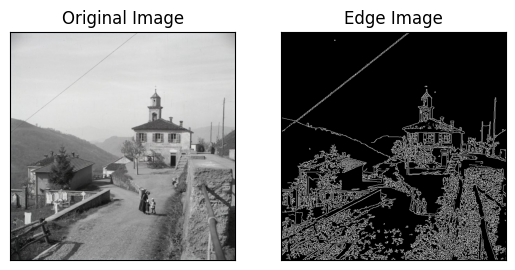

In [19]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [12]:
# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)
  
    # Stores the value of sin(theta) in b
    b = np.sin(theta)
  
    # x0 stores the value rcos(theta)
    x0 = a*r
  
    # y0 stores the value rsin(theta)
    y0 = b*r
  
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))
  
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))
  
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))
  
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

In [13]:
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
cv2.imwrite('linesDetected.jpg', img)

True